###Question

Data:

$$C_1: p(x|C_1) = N(\mu_1, \sigma_1)$$

$$C_2: p(x|C_2) = N(\mu_2, \sigma_2)$$

Prior probability of classes:

$$P(C_1) = \pi_1, \quad P(C_2) = \pi_2, \quad \pi_1 + \pi_2 = 1$$


###Answer

####A

Calculate discriminant function for class 1:
$$g_{1}(x) = -\frac{1}{2}(x-\mu_{1})^{t}\sigma_{1}^{-1}(x-\mu_{1})-\frac{d}{2}\ln~2\pi-\frac{1}{2}\ln|\sigma_{1}|+\ln~P(C_{1})$$

$$g_{1}(x) = -\frac{1}{2}(x-\mu_{1})^{t}\sigma_{1}^{-1}(x-\mu_{1})-\frac{d}{2}\ln~2\pi-\frac{1}{2}\ln|\sigma_{1}|+\ln~\pi_1$$

Calculate discriminant function for class 2:
$$g_{2}(x) = -\frac{1}{2}(x-\mu_{2})^{t}\sigma_{2}^{-1}(x-\mu_{2})-\frac{d}{2}\ln~2\pi-\frac{1}{2}\ln|\sigma_{2}|+\ln~P(C_{2})$$

$$g_{2}(x) = -\frac{1}{2}(x-\mu_{2})^{t}\sigma_{2}^{-1}(x-\mu_{2})-\frac{d}{2}\ln~2\pi-\frac{1}{2}\ln|\sigma_{2}|+\ln~\pi_2$$

$$g_{2}(x) = -\frac{1}{2}(x-\mu_{2})^{t}\sigma_{2}^{-1}(x-\mu_{2})-\frac{d}{2}\ln~2\pi-\frac{1}{2}\ln|\sigma_{2}|+\ln~(1-\pi_1)$$

Calculate discriminant function for the problem:
$$g(x) = g_{1}(x)-g_{2}(x) = -\frac{1}{2}(x-\mu_{1})^{t}\sigma_{1}^{-1}(x-\mu_{1}) + \frac{1}{2}(x-\mu_{2})^{t}\sigma_{2}^{-1}(x-\mu_{2})+\frac{1}{2}\ln\frac{|\sigma_{2}|}{|\sigma_{1}|}+\ln\frac{\pi_{1}}{\pi_{2}}$$


####B

Calculate decision boundary with minimum error using the discriminant function

Case 1: Equal Covariance Matrices $(σ_1=σ_2​)$

if we set $(σ_1=σ_2​)$ in discriminant function calculated above, we get:
$$g(x) = (\mu_{1}-\mu_{2})^{T}\sigma^{-1}x-\frac{1}{2}(\mu_{1}^{T}\sigma^{-1}\mu_{1}-\mu_{2}^{T}\sigma^{-1}\mu_{2})+\ln\frac{\pi_{1}}{\pi_{2}}$$

for calculating decision boundary, we should set g(x) = 0:
$$(\mu_{1}-\mu_{2})^{T}\sigma^{-1}x=\frac{1}{2}(\mu_{1}^{T}\sigma^{-1}\mu_{1}-\mu_{2}^{T}\sigma^{-1}\mu_{2})-\ln\frac{\pi_{1}}{\pi_{2}}$$

This represents a linear decision boundary:
$$w^{T}x+w_{0}=0$$
Where:

$w=\sigma^{-1}(\mu_{1}-\mu_{2})$

$w_{0}=-\frac{1}{2}(\mu_{1}^{T}\sigma^{-1}\mu_{1}-\mu_{2}^{T}\sigma^{-1}\mu_{2})+\ln\frac{\pi_{1}}{\pi_{2}}$

Case 2: Unequal Covariance Matrices $(σ_1≠σ_2​)$

Again we set g(x) = 0:
$$(x-\mu_{2})^{T}\sigma_{2}^{-1}(x-\mu_{2})-(x-\mu_{1})^{T}\sigma_{1}^{-1}(x-\mu_{1})=\ln\frac{\pi_{2}^2|\sigma_{1}|}{\pi_{1}^2|\sigma_{2}|}$$

This represents a quadratic decision boundary.

$$x^{T}(\sigma_{2}^{-1}-\sigma_{1}^{-1})x-2(\mu_{2}^{T}\sigma_{2}^{-1}-\mu_{1}^{T}\sigma_{1}^{-1})x+(\mu_{2}^{T}\sigma_{2}^{-1}\mu_{2}-\mu_{1}^{T}\sigma_{1}^{-1}\mu_{1})=\ln\frac{\pi_{2}^2|\sigma_{1}|}{\pi_{1}^2|\sigma_{2}|}$$

####C

Effect of increasing $\pi_1$ and consequently decreasing $\pi_2$

If g1(x) increases while g2(x) decrease, the decision boundary between the two classes moves in favor of C1. The point at which g1(x)=g2(x), which defines the boundary, shifts towards the region that favors C1​.

####D

For this case, where $(σ_1=σ_2​)$, we found out:

$$(\mu_{1}-\mu_{2})^{T}\sigma^{-1}x=\frac{1}{2}(\mu_{1}^{T}\sigma^{-1}\mu_{1}-\mu_{2}^{T}\sigma^{-1}\mu_{2})-\ln\frac{\pi_{1}}{\pi_{2}}$$

So if we use values given in the question:

$$-2x = \frac{1}{2}(4-16)$$

$$x=3$$

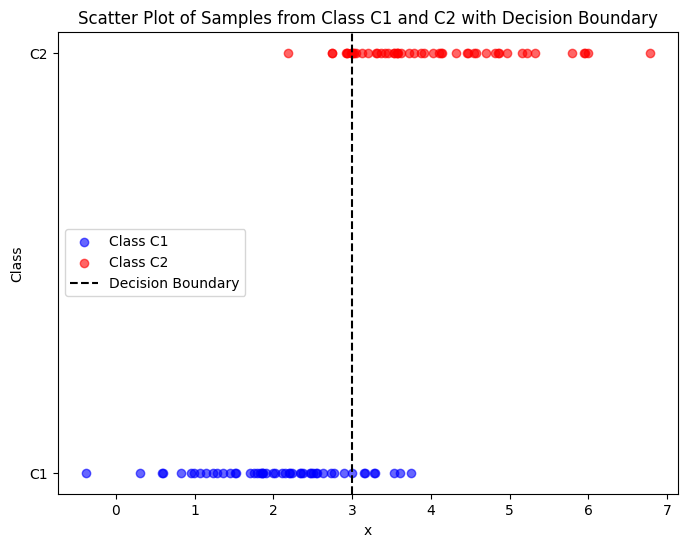

In [50]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = 2
sigma1 = 1
mu2 = 4
sigma2 = 1
pi1 = 0.5
pi2 = 0.5

n_samples = 100

class_1_samples = np.random.normal(mu1, sigma1, int(pi1 * n_samples))
class_2_samples = np.random.normal(mu2, sigma2, int(pi2 * n_samples))

decision_boundary = 3

plt.figure(figsize=(8, 6))

plt.scatter(class_1_samples, np.zeros_like(class_1_samples), color='blue', label='Class C1', alpha=0.6)
plt.scatter(class_2_samples, np.ones_like(class_2_samples), color='red', label='Class C2', alpha=0.6)

plt.axvline(x=decision_boundary, color='black', linestyle='--', label='Decision Boundary')

plt.title('Scatter Plot of Samples from Class C1 and C2 with Decision Boundary')
plt.xlabel('x')
plt.ylabel('Class')
plt.yticks([0, 1], ['C1', 'C2'])

plt.legend(loc='center left')

plt.show()

####E

Set labels for each Class

In [51]:
labels_class_1 = np.zeros_like(class_1_samples)  # Class C1: 0
labels_class_2 = np.ones_like(class_2_samples)   # Class C2: 1

Calculate confusion matrix, accuracy, precision, recall, F1-score

In [52]:
import numpy as np

samples = np.concatenate([class_1_samples, class_2_samples])
true_labels = np.concatenate([labels_class_1, labels_class_2])

predicted_labels = np.where(samples < decision_boundary, 0, 1)

# Confusion matrix computation
tp = ((true_labels == 1) & (predicted_labels == 1)).sum()
tn = ((true_labels == 0) & (predicted_labels == 0)).sum()
fp = ((true_labels == 0) & (predicted_labels == 1)).sum()
fn = ((true_labels == 1) & (predicted_labels == 0)).sum()

# Confusion matrix
cm = np.array([[tn, fp],
               [fn, tp]])

# Metrics computation
accuracy = (tp + tn) / len(true_labels)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
[[42  8]
 [ 8 42]]
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-Score: 0.84


####F

Plot ROC curve:

For each data point x, we calculated the likelihood for both class C1 ($p(C_1|x)$) and class C2 ($p(C_2|x)$) using their respective Gaussian distributions (normal pdf).

For a sample x, the likelihood $p(x∣C_i)$ quantifies how probable it is to observe x given that it belongs to class $C_i$​, which calculated use Gaussian pdf:

$$P(x|\mu,\sigma^{2})=\frac{1}{\sqrt{2\sigma^{2}\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

Now we will use it to calculate likelihood foe each class:

$$P(C_{k}|x)=\frac{P(x|C_{k})P(C_{k})}{P(x)}$$

The likelihood ratio compares the likelihoods of the two competing hypotheses.

We then calculate the log of the likelihood ratio, which will serve as our decision score.

Taking the logarithm of the likelihood ratio is often more convenient for numerical stability and interpretability.

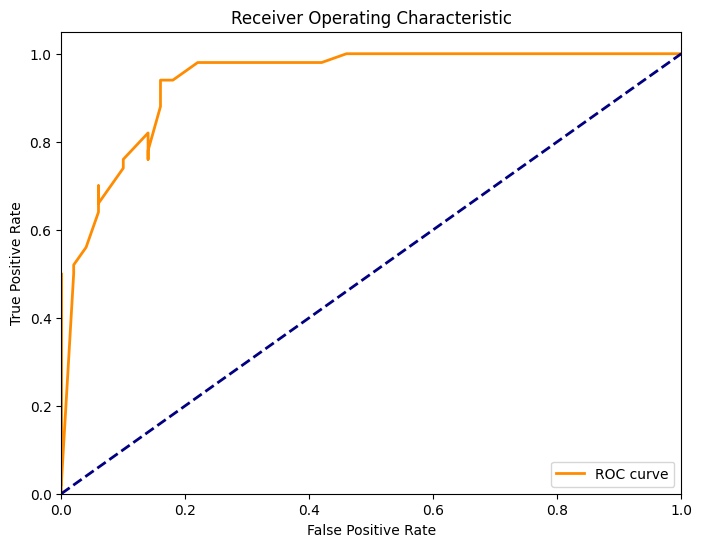

In [53]:
X = np.concatenate([class_1_samples, class_2_samples])
y = np.concatenate([labels_class_1, labels_class_2])

def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

likelihood_class_1 = normal_pdf(X, mu1, sigma1) * pi1
likelihood_class_2 = normal_pdf(X, mu2, sigma2) * pi2

decision_scores = np.log(likelihood_class_2 / likelihood_class_1)

thresholds = np.linspace(-10, 10, 200)
fpr_list = []
tpr_list = []

for threshold in thresholds:
    predicted_labels = (decision_scores >= threshold).astype(int)
    tn = ((y == 0) & (predicted_labels == 0)).sum()
    fp = ((y == 0) & (predicted_labels == 1)).sum()
    fn = ((y == 1) & (predicted_labels == 0)).sum()
    tp = ((y == 1) & (predicted_labels == 1)).sum()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr_list.append(fpr)
    tpr_list.append(tpr)

tpr_list = np.array(tpr_list)
fpr_list = np.array(fpr_list)
sorted_indices = np.argsort(fpr_list)
tpr_list = tpr_list[sorted_indices]
fpr_list = fpr_list[sorted_indices]

plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Calculate AUROC

Trapezoidal Integration:

Use the trapezoidal rule: For two consecutive points $(x_1,y_1​)$ and $(x_2​,y_2​)$:

$$Area = (x_2 - x_1) \times \frac{y_1 + y_2}{2}$$

Sum these areas to calculate the AUROC

In [54]:
from itertools import pairwise

def trapezoidal_integration(x, y):
    area = 0.0
    for (x1, x2), (y1, y2) in zip(pairwise(x), pairwise(y)):
        area += (x2 - x1) * (y1 + y2) / 2
    return area

sorted_indices = np.argsort(fpr_list)
fpr_sorted = np.array(fpr_list)[sorted_indices]
tpr_sorted = np.array(tpr_list)[sorted_indices]

roc_auc = trapezoidal_integration(fpr_sorted, tpr_sorted)

print(f"Area Under the Curve (AUROC): {roc_auc:.2f}")

Area Under the Curve (AUROC): 0.94


####G

#####Repeat steps for $\pi_1=0.9$, $\pi_2=0.1$

Sampling and draw decision boundary

For this case, where $(σ_1=σ_2​)$, we found out:

$$(\mu_{1}-\mu_{2})^{T}\sigma^{-1}x=\frac{1}{2}(\mu_{1}^{T}\sigma^{-1}\mu_{1}-\mu_{2}^{T}\sigma^{-1}\mu_{2})-\ln\frac{\pi_{1}}{\pi_{2}}$$

So if we use values given in the question:

$$-2x = \frac{1}{2}(4-16) - 0.95$$

$$x=3.475$$

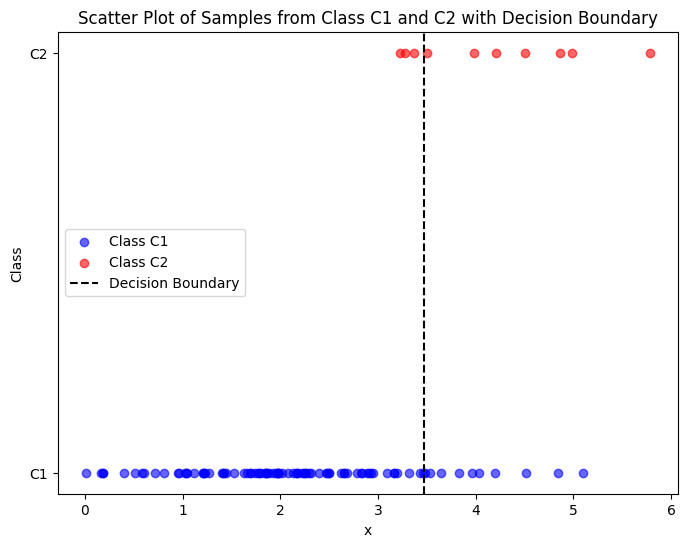

In [55]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = 2
sigma1 = 1
mu2 = 4
sigma2 = 1
pi1 = 0.9
pi2 = 0.1

n_samples = 100

class_1_samples = np.random.normal(mu1, sigma1, int(pi1 * n_samples))
class_2_samples = np.random.normal(mu2, sigma2, int(pi2 * n_samples))

decision_boundary = 3.475

plt.figure(figsize=(8, 6))

plt.scatter(class_1_samples, np.zeros_like(class_1_samples), color='blue', label='Class C1', alpha=0.6)
plt.scatter(class_2_samples, np.ones_like(class_2_samples), color='red', label='Class C2', alpha=0.6)

plt.axvline(x=decision_boundary, color='black', linestyle='--', label='Decision Boundary')

plt.title('Scatter Plot of Samples from Class C1 and C2 with Decision Boundary')
plt.xlabel('x')
plt.ylabel('Class')
plt.yticks([0, 1], ['C1', 'C2'])

plt.legend(loc='center left')

plt.show()

#####Set labels for each Class

In [56]:
labels_class_1 = np.zeros_like(class_1_samples)  # Class C1: 0
labels_class_2 = np.ones_like(class_2_samples)   # Class C2: 1

#####Calculate confusion matrix, accuracy, precision, recall, F1-score

In [57]:
import numpy as np

samples = np.concatenate([class_1_samples, class_2_samples])
true_labels = np.concatenate([labels_class_1, labels_class_2])

predicted_labels = np.where(samples < decision_boundary, 0, 1)

# Confusion matrix computation
tp = ((true_labels == 1) & (predicted_labels == 1)).sum()
tn = ((true_labels == 0) & (predicted_labels == 0)).sum()
fp = ((true_labels == 0) & (predicted_labels == 1)).sum()
fn = ((true_labels == 1) & (predicted_labels == 0)).sum()

# Confusion matrix
cm = np.array([[tn, fp],
               [fn, tp]])

# Metrics computation
accuracy = (tp + tn) / len(true_labels)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
[[80 10]
 [ 3  7]]
Accuracy: 0.87
Precision: 0.41
Recall: 0.70
F1-Score: 0.52


#####Plot ROC curve

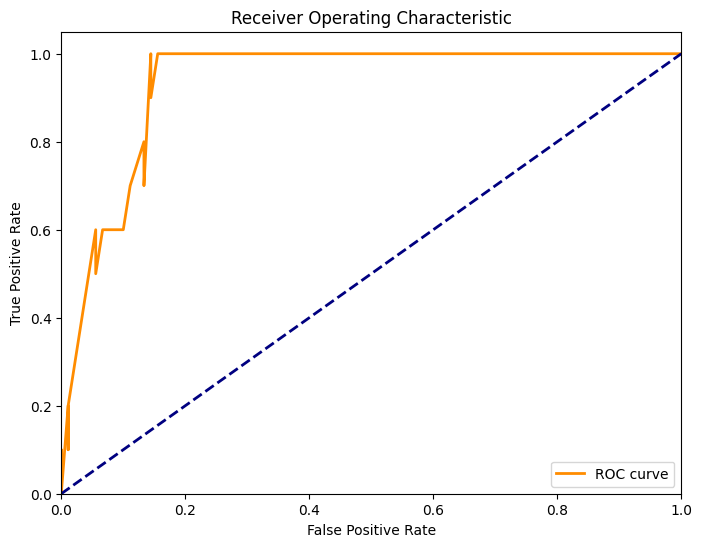

In [58]:
X = np.concatenate([class_1_samples, class_2_samples])
y = np.concatenate([labels_class_1, labels_class_2])

def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

likelihood_class_1 = normal_pdf(X, mu1, sigma1) * pi1
likelihood_class_2 = normal_pdf(X, mu2, sigma2) * pi2

decision_scores = np.log(likelihood_class_2 / likelihood_class_1)

thresholds = np.linspace(-10, 10, 200)
fpr_list = []
tpr_list = []

for threshold in thresholds:
    predicted_labels = (decision_scores >= threshold).astype(int)
    tn = ((y == 0) & (predicted_labels == 0)).sum()
    fp = ((y == 0) & (predicted_labels == 1)).sum()
    fn = ((y == 1) & (predicted_labels == 0)).sum()
    tp = ((y == 1) & (predicted_labels == 1)).sum()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr_list.append(fpr)
    tpr_list.append(tpr)

tpr_list = np.array(tpr_list)
fpr_list = np.array(fpr_list)
sorted_indices = np.argsort(fpr_list)
tpr_list = tpr_list[sorted_indices]
fpr_list = fpr_list[sorted_indices]

plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#####Calculate AUROC

In [59]:
from itertools import pairwise

def trapezoidal_integration(x, y):
    area = 0.0
    for (x1, x2), (y1, y2) in zip(pairwise(x), pairwise(y)):
        area += (x2 - x1) * (y1 + y2) / 2
    return area

sorted_indices = np.argsort(fpr_list)
fpr_sorted = np.array(fpr_list)[sorted_indices]
tpr_sorted = np.array(tpr_list)[sorted_indices]

roc_auc = trapezoidal_integration(fpr_sorted, tpr_sorted)

print(f"Area Under the Curve (AUROC): {roc_auc:.2f}")

Area Under the Curve (AUROC): 0.93


####H

As we see, the accuracy has increased, but precision, recall and f1score has decreased, which indicates imbalance in our dataset. We shifted decision boundary to one of our classes by changing values of $\pi_1$ and $\pi_2$, so this result was expected.